In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [38]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test['Transported'] = False
df_id = df_test['PassengerId']
df = pd.concat([df_train, df_test], sort = False)
df.drop(['Name', 'PassengerId'], axis = 1, inplace = True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [39]:

df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,False
4273,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,False
4274,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,False
4275,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,False


In [40]:
df_id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [41]:
dataset_df_test = df_test.drop(['PassengerId', 'Name'], axis=1)
dataset_df_test.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,False
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,False
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,False
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,False


In [42]:
df.shape[0] == df_train.shape[0] + df_test.shape[0]

True

## Data Cleaning

Calculating the percentage of missing values in each column for both datasets

In [43]:
train_missing_values = df_train.isnull().mean() * 100
test_missing_values = df_test.isnull().mean() * 100

train_missing_values, test_missing_values

(PassengerId     0.000000
 HomePlanet      2.312205
 CryoSleep       2.496261
 Cabin           2.289198
 Destination     2.093639
 Age             2.059128
 VIP             2.335212
 RoomService     2.082135
 FoodCourt       2.105142
 ShoppingMall    2.392730
 Spa             2.105142
 VRDeck          2.162660
 Name            2.300702
 Transported     0.000000
 dtype: float64,
 PassengerId     0.000000
 HomePlanet      2.034136
 CryoSleep       2.174421
 Cabin           2.338087
 Destination     2.151040
 Age             2.127660
 VIP             2.174421
 RoomService     1.917232
 FoodCourt       2.478373
 ShoppingMall    2.291326
 Spa             2.361468
 VRDeck          1.870470
 Name            2.197802
 Transported     0.000000
 dtype: float64)

Fill missing values for categorical columns using mode

In [44]:
df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode()[0], inplace=True)
df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode()[0], inplace=True)

df_train['CryoSleep'].fillna(df_train['CryoSleep'].mode()[0], inplace=True)
df_test['CryoSleep'].fillna(df_test['CryoSleep'].mode()[0], inplace=True)

df_train['VIP'].fillna(df_train['VIP'].mode()[0], inplace=True)
df_test['VIP'].fillna(df_test['VIP'].mode()[0], inplace=True)

df_train['Destination'].fillna(df_train['Destination'].mode()[0], inplace=True)
df_test['Destination'].fillna(df_test['Destination'].mode()[0], inplace=True)

# Fill missing values in numerical columns with median
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numerical_cols:
    df_train[col].fillna(df_train[col].median(), inplace=True)
    df_test[col].fillna(df_test[col].median(), inplace=True)

# Check if any missing values remain
train_missing_after = df_train.isnull().sum()
test_missing_after = df_test.isnull().sum()

train_missing_after, test_missing_after

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5340\3888119248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode()[0], inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5340\3888119248.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

(PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin           199
 Destination       0
 Age               0
 VIP               0
 RoomService       0
 FoodCourt         0
 ShoppingMall      0
 Spa               0
 VRDeck            0
 Name            200
 Transported       0
 dtype: int64,
 PassengerId       0
 HomePlanet        0
 CryoSleep         0
 Cabin           100
 Destination       0
 Age               0
 VIP               0
 RoomService       0
 FoodCourt         0
 ShoppingMall      0
 Spa               0
 VRDeck            0
 Name             94
 Transported       0
 dtype: int64)

### Visualization based on passanger data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5340\2307276578.py:11: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x='HomePlanet', data=dataset_df_test, hue='HomePlanet', palette=palette_homeplanet)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5340\2307276578.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spending.index, y=spending.values, palette=bar_colors)


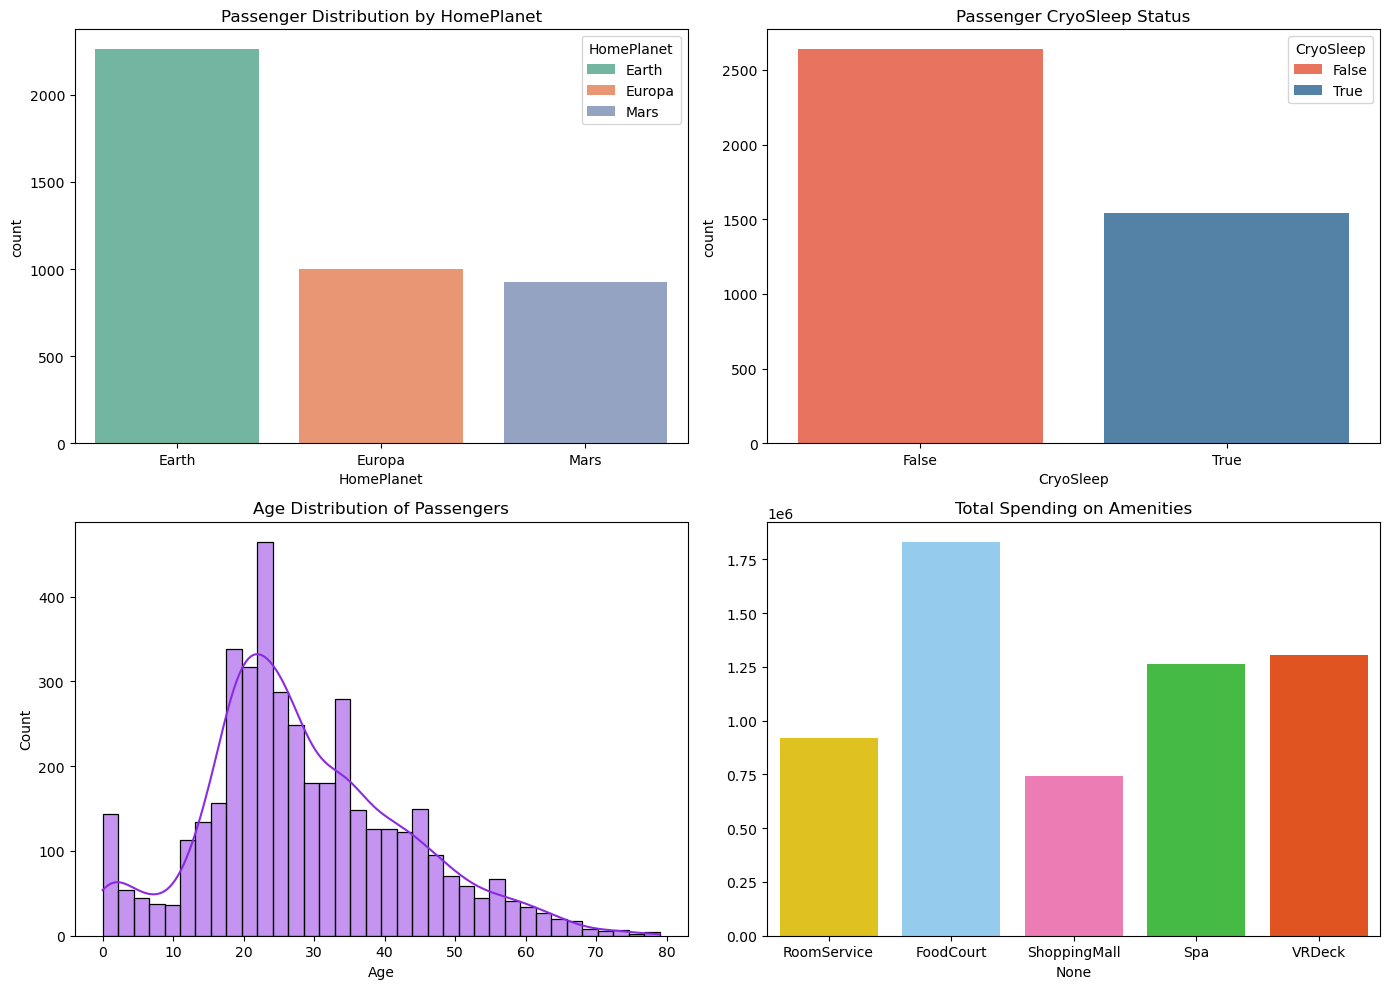

In [45]:
plt.figure(figsize=(14, 10))

# Custom colors
palette_homeplanet = sns.color_palette("Set2")  # Different colors for HomePlanet
palette_cryosleep = ['#FF6347', '#4682B4']  # Custom colors for CryoSleep (True/False)
hist_color = '#8A2BE2'  # Purple color for Age distribution
bar_colors = ['#FFD700', '#87CEFA', '#FF69B4', '#32CD32', '#FF4500']  # Custom colors for spending

# Plot 1: Distribution of passengers by HomePlanet
plt.subplot(2, 2, 1)
sns.countplot(x='HomePlanet', data=dataset_df_test, hue='HomePlanet', palette=palette_homeplanet)
plt.title('Passenger Distribution by HomePlanet')

# Plot 2: CryoSleep status
plt.subplot(2, 2, 2)
sns.countplot(x='CryoSleep', data=dataset_df_test, hue='CryoSleep',palette=palette_cryosleep)
plt.title('Passenger CryoSleep Status')

# Plot 3: Passenger Age Distribution
plt.subplot(2, 2, 3)
sns.histplot(dataset_df_test['Age'].dropna(), kde=True, color=hist_color)
plt.title('Age Distribution of Passengers')

# Plot 4: Spending on Various Amenities
plt.subplot(2, 2, 4)
spending = dataset_df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()
sns.barplot(x=spending.index, y=spending.values, palette=bar_colors)
plt.title('Total Spending on Amenities')

plt.tight_layout()
plt.show()

## Age vs Sepnding

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5340\2028071946.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='RoomService', data=dataset_df_test, palette="coolwarm")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5340\2028071946.py:19: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='AgeGroup', y='FoodCourt', data=dataset_df_test,hue='CryoSleep', palette=palette_homeplanet, legend=False)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5340\2028071946.py:29: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x='AgeGroup', y='Spa', data=dataset_df_test,hue='CryoSleep', palette=bar_colors, legend=False)


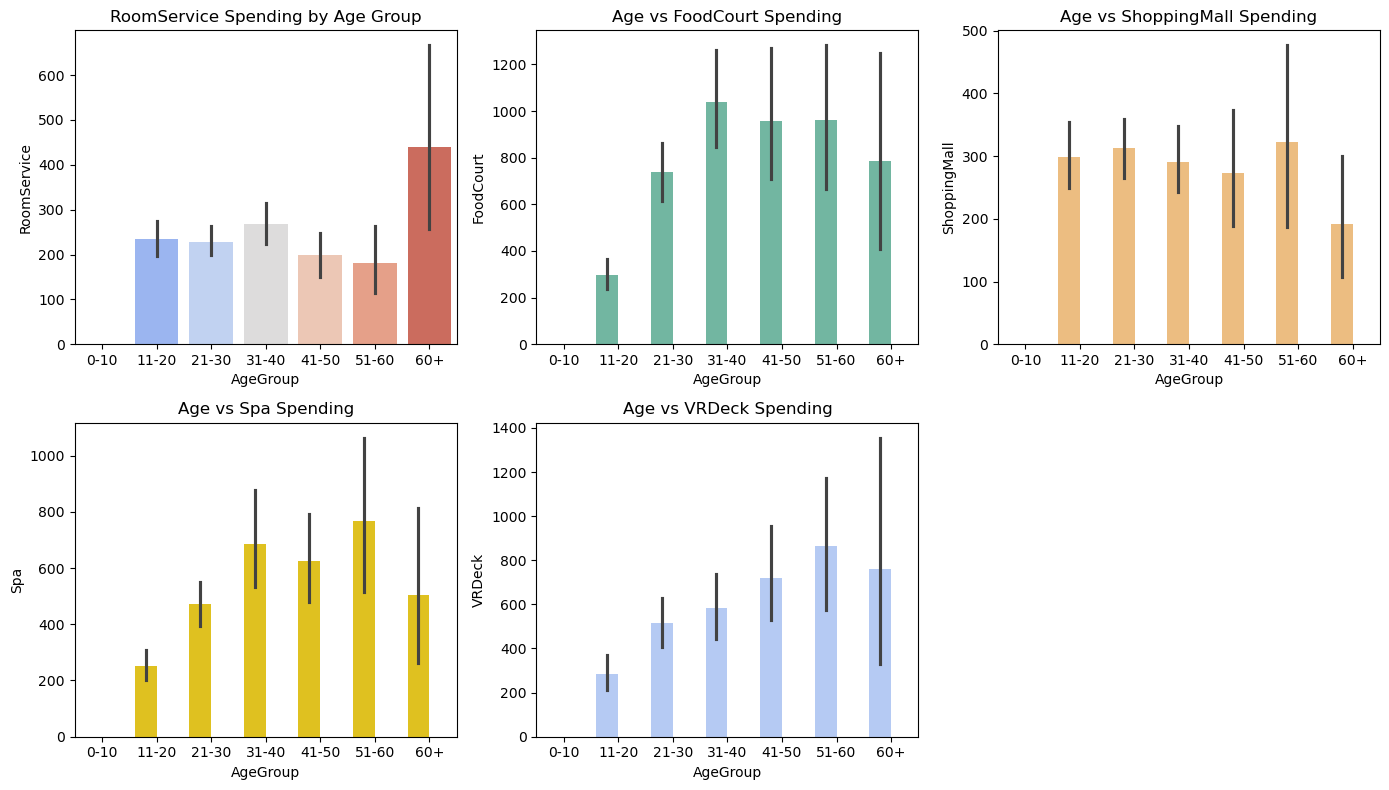

In [46]:
# Plotting Age vs Spending on individual amenities

plt.figure(figsize=(14, 8))

# Define the age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']

# Add a new column 'AgeGroup' by binning 'Age'
dataset_df_test['AgeGroup'] = pd.cut(dataset_df_test['Age'], bins=bins, labels=labels)

# Plotting RoomService spending by AgeGroup using a boxplot
plt.subplot(2, 3, 1)
sns.barplot(x='AgeGroup', y='RoomService', data=dataset_df_test, palette="coolwarm")
plt.title('RoomService Spending by Age Group')

# Plot 2: Age vs FoodCourt Spending
plt.subplot(2, 3, 2)
sns.barplot(x='AgeGroup', y='FoodCourt', data=dataset_df_test,hue='CryoSleep', palette=palette_homeplanet, legend=False)
plt.title('Age vs FoodCourt Spending')

# Plot 3: Age vs ShoppingMall Spending
plt.subplot(2, 3, 3)
sns.barplot(x='AgeGroup', y='ShoppingMall', data=dataset_df_test,hue='CryoSleep', palette='Spectral', legend=False)
plt.title('Age vs ShoppingMall Spending')

# Plot 4: Age vs Spa Spending
plt.subplot(2, 3, 4)
sns.barplot(x='AgeGroup', y='Spa', data=dataset_df_test,hue='CryoSleep', palette=bar_colors, legend=False)
plt.title('Age vs Spa Spending')

# Plot 5: Age vs VRDeck Spending
plt.subplot(2, 3, 5)
sns.barplot(x='AgeGroup', y='VRDeck', data=dataset_df_test,hue='CryoSleep', palette='coolwarm', legend=False)
plt.title('Age vs VRDeck Spending')

plt.tight_layout()
plt.show()

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer

In [49]:
df.isnull().mean()*100

HomePlanet      2.220509
CryoSleep       2.390131
Cabin           2.305320
Destination     2.112567
Age             2.081727
VIP             2.282190
RoomService     2.027756
FoodCourt       2.228219
ShoppingMall    2.359291
Spa             2.189668
VRDeck          2.066307
Transported     0.000000
dtype: float64

In [50]:
df = df.dropna(axis=0)

In [51]:
df.isnull().mean()*100

HomePlanet      0.0
CryoSleep       0.0
Cabin           0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Transported     0.0
dtype: float64